[src](https://drive.google.com/file/d/0BwF-hgLDpCD6UTlYLXBZX1BwWHc/view)

## Abstract and intro
* because true purchase probabilities are too small, propose a model: 1. ranking 2. calibration method
* explain why ordinal models are better for ad selection and near optimal for clicks
* $E[V(i)] = \sum_{a \in C(i)} Pr(a|i) V(a)$
    * $C(i)$ is all the possible outcomes 
    * $Pr(a|i)$ is the probability of outcome given impression
    * $V(a)$ is the value of auction
* contributions
    * rank ads
    * probability calibration with nonuniforming binning
    * shows better performance from ordinal models

## Problem Framework
* bidder -> select top k ads -> convert ad scores to probabiltiy and calculate bid value
* $P \in C \in I$, purchase, clicks, impressions

## Predicting ClickAttributed purchases from impressions: ordinal regression model
* binary classifier
    * $C_1 \sum_{y_i=1} log(1 + e^{-f(x_i)}) + C_{-1} \sum_{y_i=-1} log(1 + e^{f(x_i)}) $
    * con: predict both click and purchases
* ordinal ranking model
    * $f_O$ predicts for an instance $x \in R^d$, a label $y \in {1,2..K}$
    * P -> 3, C -> 2, I -> 1
* converting ordinal to binary problem
    * $x^k = (x, e_k)$, $y^k = 2 * 1 [k < y] - 1$, $w_y^k = | C_{y,k} - C_{y, k+1} |$
    * $e_k$ is the standard basis, $C_{y,k} = 1 * | y != k|$
    * e.g. for K = 3, y = 1, will expand into 2 instances: $x^1 = (x, 1, 0)$ and $x^2 = (x, 0, 1)$
    * $y^1 = -1$, $y^2 = -1$, $w_y^1 = 1$, $w_y^2 = 0$
    * $C_1 \sum_{y^k = 1} w^k_{y_i} log(1 + e^{-f(x_i^k)}) + C_{-1} \sum_{y^k = -1} w_{y_i}^k log(1 + e^{f(x_i^k)})$

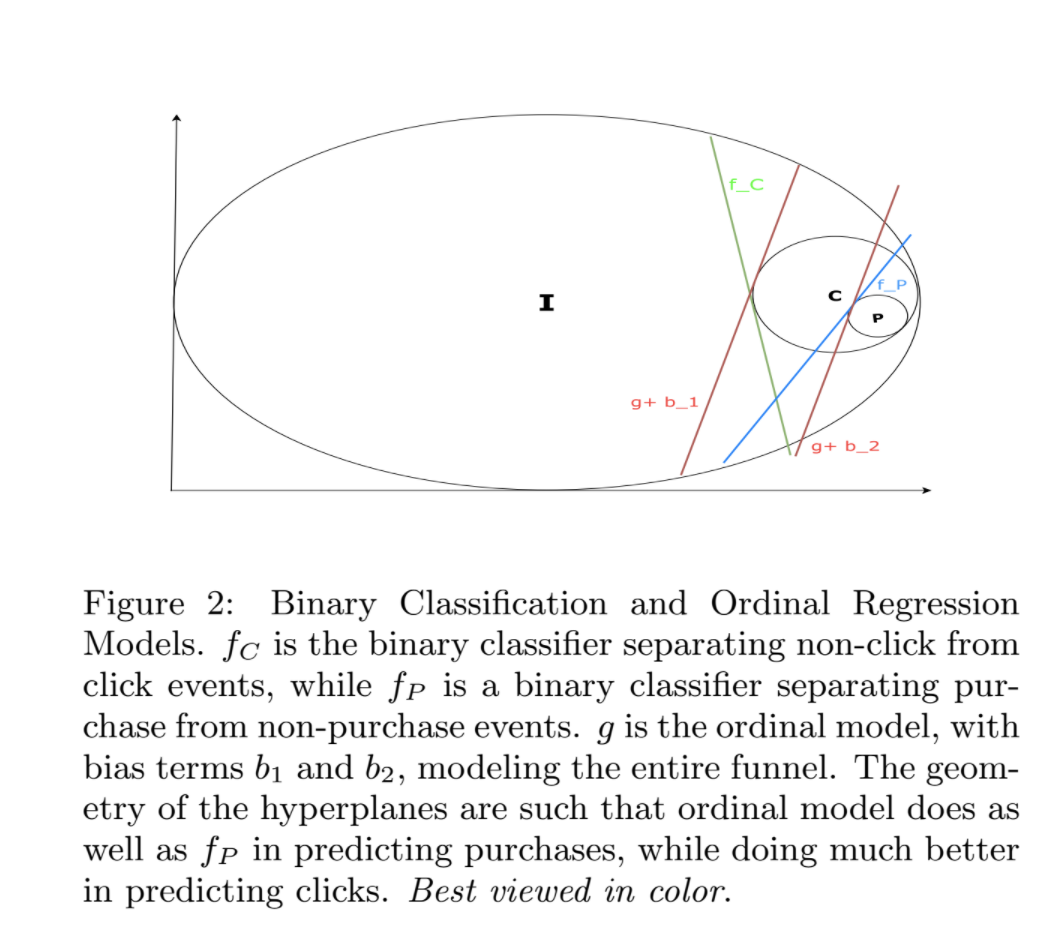

In [1]:
from IPython.display import Image
Image("pics/ranking_clicks_why_ordinal_better.png")

* class imbalance and differential weights 
    * usually we subsample the negative and use different weights

## Calibration
* propose new non uniform binning technique
### technique
1. sort scores, construct bins based on positives only! 
2. set number of bins by binary search, to minimize KL Divergence between empirical probabilities and sigmoid function 

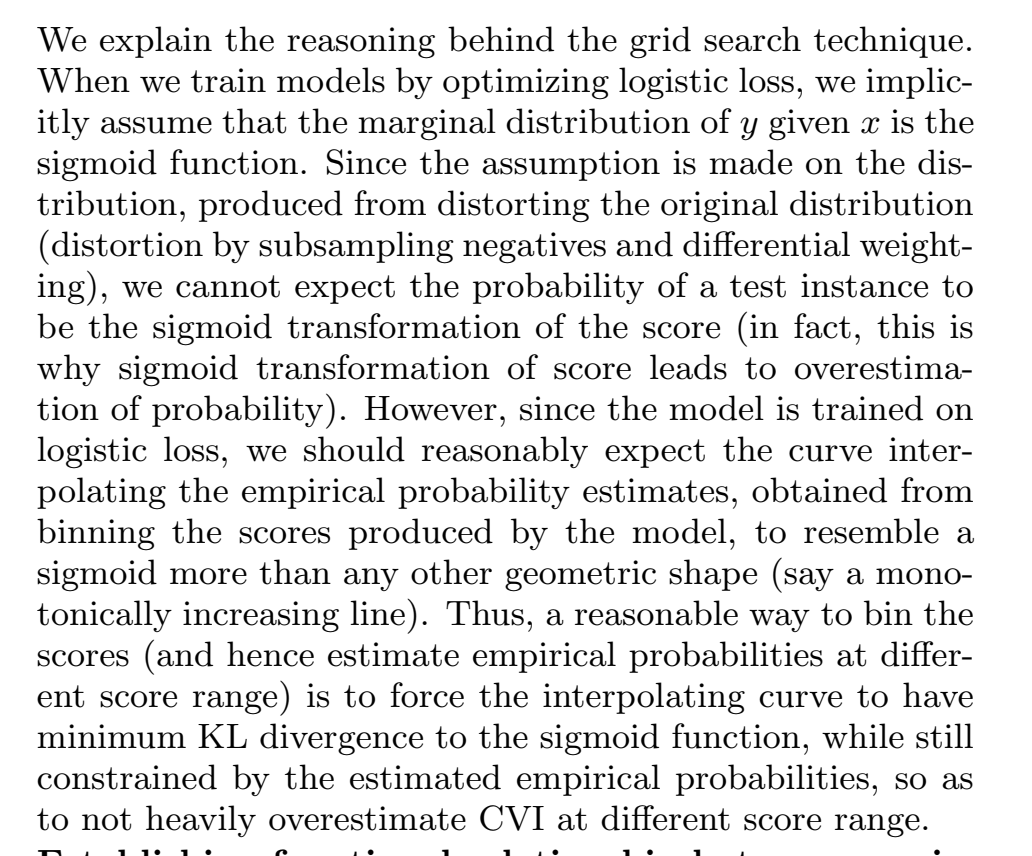

In [2]:
Image("pics/ranking_clicks_calibration_explanation.png")